<a href="https://colab.research.google.com/github/daryabara/Hw2/blob/main/Hw2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Точность прогноза: 0.5266666666666666


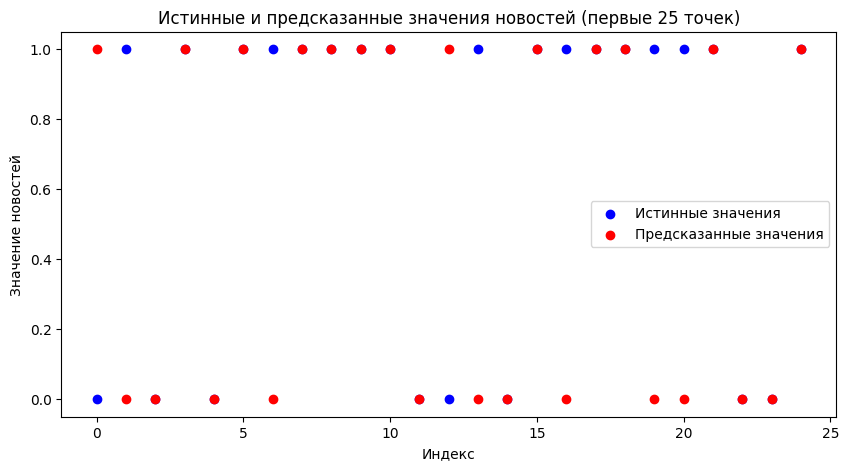

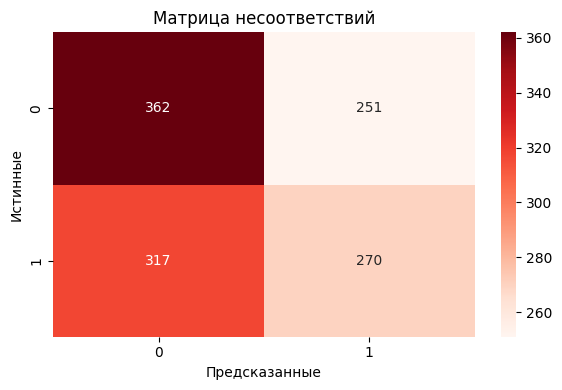

In [44]:
# main.py
import ml_module as ml
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

# Загрузка данных
file_path = 'fake_news_dataset.csv'  # Замените на путь к вашему CSV файлу
df = ml.load_data(file_path)

"""Создаем простой предиктор логистической регрессии для классификации новостей как фейковых или реальных
Будем использовать выбранные числовые признаки в качестве предикторов
Вводим целевую переменную lable"""
le = LabelEncoder()
df['label_encoded'] = le.fit_transform(df['label'])

# Выводим характеристики для оделирования
features = ['sentiment_score', 'word_count', 'char_count', 'has_images','has_videos',
            'readability_score', 'num_shares', 'num_comments', 'trust_score',
            'source_reputation', 'clickbait_score', 'plagiarism_score']

# Определяе Х и у
X = df[features]
y = df['label_encoded']

# скалируем (приводим к общемму значению)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# делим на обучение и тестирование
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# строим логистическую регрессионную модель
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# прогнозируем и рассчитываем точность
y_pred = logreg.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Точность прогноза:', accuracy)

def plot_predictions(y_true, y_pred, num_points=25):
    plt.figure(figsize=(10, 5))
    plt.scatter(range(num_points), y_true[:num_points], color='blue', label='Истинные значения')
    plt.scatter(range(num_points), y_pred[:num_points], color='red', label='Предсказанные значения')
    plt.xlabel('Индекс')
    plt.ylabel('Значение новостей')
    plt.title(f'Истинные и предсказанные значения новостей (первые {num_points} точек)')
    plt.legend()
    plt.show()

plot_predictions(y_test, y_pred)

# матрица несоответствий
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds')
plt.title('Матрица несоответствий')
plt.xlabel('Предсказанные')
plt.ylabel('Истинные')
plt.tight_layout()
plt.show()



In [26]:
# main.py
#import ml_module as ml
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

# Загрузка данных
file_path = 'fake_news_dataset.csv'  # Замените на путь к вашему CSV файлу
data = pd.read_csv(file_path)
data.head(2)

,id,title,author,text,state,date_published,source,category,sentiment_score,word_count,...,num_shares,num_comments,political_bias,fact_check_rating,is_satirical,trust_score,source_reputation,clickbait_score,plagiarism_score,label
0,1,Breaking News 1,Jane Smith,This is the content of article 1. It contains ...,Tennessee,30-11-2021,The Onion,Entertainment,-0.22,1302,...,47305,450,Center,FALSE,1,76,6,0.84,53.35,Fake
1,2,Breaking News 2,Emily Davis,This is the content of article 2. It contains ...,Wisconsin,02-09-2021,The Guardian,Technology,0.92,322,...,39804,530,Left,Mixed,1,1,5,0.85,28.28,Fake
